# Capstone Project

Activity Model


In [1]:
# The library
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression as lr
import numpy as np
import ipywidgets as wg

In [2]:
# Read CSV file without header
df = pd.read_csv("CapstoneProject_Dataset.csv", header= None)

In [3]:
# Add header row
df.columns = ['City', 'State', 'Provider_number', 'Distinct_Referral_Pairs', 'Referral_Volume', 'Total_Num_Referral_Triples_sum']

In [4]:
# Display DataFrame with header
df

,City,State,Provider_number,Distinct_Referral_Pairs,Referral_Volume,Total_Num_Referral_Triples_sum
0,ABBEVILLE,ALABAMA,5,32,31345,32
1,ABBEVILLE,LOUISIANA,38,347,122187,347
2,ABBEVILLE,SOUTH CAROLINA,17,141,67245,141
3,ABERDEEN,IDAHO,1,1,109,1
4,ABERDEEN,MARYLAND,21,53,19473,53
...,...,...,...,...,...,...
10394,ZION,ILLINOIS,16,57,12979,57
10395,ZIONSVILLE,INDIANA,17,31,2765,31
10396,ZUMBROTA,MINNESOTA,2,4,358,4
10397,ZUNI,NEW MEXICO,11,46,12500,46


In [5]:
# Save the DataFrame to a new CSV file
df.to_csv('Capstone_data_withheader.csv', index=False)

In [6]:
# Exclude all cities where the sum of the field that counts the triples of providers and clients is less than 11
df = df[df['Total_Num_Referral_Triples_sum'] > 10]

## The Dataset
Using line regression I will investigate three possible relationships between the number of providers
and distinct refferal pairs:
* A linear relationship
* A quadratic relationship
* A log-linear relationship


## Fit the Linear Model
We are using the Linear Regression object that we aliased as `lr` during the import. 
Our first linear regression investigates the number of  refferal volume as a function of the number of providers.
$$
\operatorname{\mathbb{E}}[\text{Referral volume}] = a \times \text{Number of providers} + b
$$
In this model, the slope $a$ is the number of Refferal volume provided by each
provider, while the intercept $b$ is a baseline Referral volume for a city with no provider.

In [25]:
# Fit the linear model
linear_network = lr().fit(
    X = df["Provider_number"].values.reshape(-1, 1),
    y = df["Referral_Volume"].values
)

# Print coefficients and intercept for the linear Network model
print(f"Intercept for Linear Activity: {linear_network.intercept_}")
print(f"Coefficient for Linear Activity: {linear_network.coef_[0]}")

Intercept for Linear Activity: -7573.775336916384
Coefficient for Linear Activity: 4610.928489319459


In [26]:
import numpy as np

# Compute Pearson correlation coefficient
pearson_corr = np.corrcoef(df["Provider_number"], df["Referral_Volume"])[0, 1]

# Compute Pearson's r^2 value
pearson_r2 = pearson_corr ** 2

print(f"Pearson's r^2 value: {pearson_r2:.2f}")

Pearson's r^2 value: 0.85


## Plot the Linear Fit


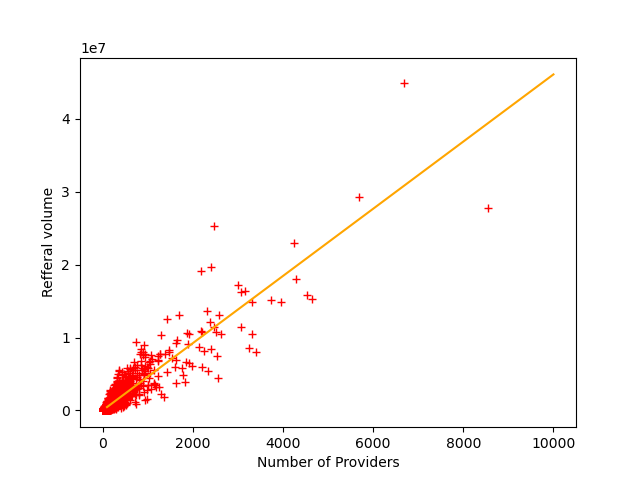

In [27]:
# Blank canvas
linearfg, linearax = mp.subplots()

# Label the axes
linearax.set_xlabel("Number of Providers")
linearax.set_ylabel("Refferal volume")

# The actual data
linearactual, = linearax.plot(
    df["Provider_number"],
    df["Referral_Volume"],
    "+r"
)

# The best fit line for Linear Model
xticks = np.linspace(10000, 100)
linearexpect, = linearax.plot(
    xticks,
    linear_network.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Fit the Quadratic Model

Our next linear regression investigates the number of refferal volume as a function of the square of the number of providers.
$$
\operatorname{\mathbb{E}}[\text{Refferal volume}] = a \times \text{Number of providers}^2 + b
$$
In this model, the slope $a$ is the number of Refferal volume provided by two
provider, while the intercept $b$ is a baseline Refferal volume for a city with no provider.

In [28]:
# Assign the result of fitting to the estimate2010 variable
quadratic_network = lr().fit(
    X = (df["Provider_number"].values**2).reshape(-1, 1),
    y = df["Referral_Volume"].values
)

# Take a look at the output
print(f"Intercept for the Quadratic Activity: {quadratic_network.intercept_}")
print(f"Coefficient for the Quadratic Activity: {quadratic_network.coef_[0]}")

Intercept for the Quadratic Activity: 328534.80189569166
Coefficient for the Quadratic Activity: 0.8110730095400258


In [29]:
# Predicting the target variable using the quadratic regression model
predicted_values = quadratic_network.predict((df["Provider_number"].values ** 2).reshape(-1, 1))

# Compute Pearson correlation coefficient
pearson_corr = np.corrcoef(df["Referral_Volume"].values, predicted_values)[0, 1]

# Compute Pearson's r^2 value
pearson_r2 = pearson_corr ** 2

print(f"Pearson's r^2 value for Quadratic Activity: {pearson_r2:.2f}")

Pearson's r^2 value for Quadratic Activity: 0.53


## Plot the Quadratic Fit


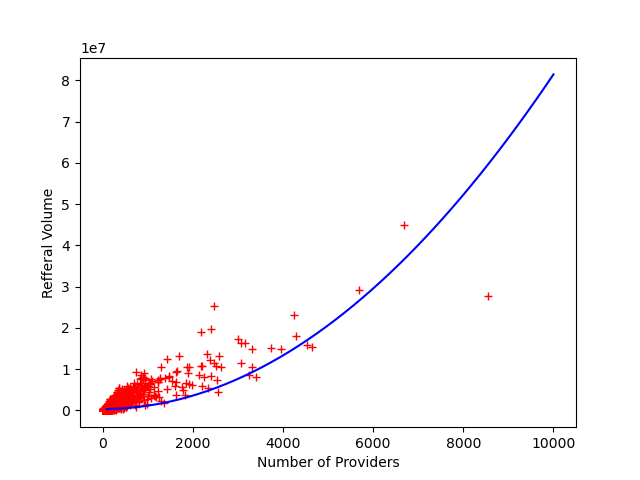

In [30]:
# Blank canvas
quadraticfg, quadraticax = mp.subplots()

# Label the axes
quadraticax.set_xlabel("Number of Providers")
quadraticax.set_ylabel("Refferal Volume")

# The actual data. 
quadraticactual, = quadraticax.plot(
    df["Provider_number"],
    df["Referral_Volume"],
    "+r"
)

# The best fit line. 
xticks = np.linspace(10000, 100)
quadraticexpect, = quadraticax.plot(
    xticks,
    quadratic_network.predict((xticks**2).reshape(-1, 1)),
    "blue"
)


## Fit the Log-Linear Model
Our final linear regression investigates the number of refferal volume as a function of the log-linear of the
the number of providers.
$$
\operatorname{\mathbb{E}}[\text{Refferal Volume}] = a \times \text{Number of providers} \times \log(\text{Number of providers}) + b
$$

In this model the Linear Regression slope $a$ coefficient associated with the log-linear of the number of providers represents the change in the expected number of referral volume for a one-unit increase in the logarithm of the number of providers, and the intercept $b$ epresents the expected number of referral volume when the logarithm of the number of providers is zero


In [31]:

loglinear_network = lr().fit(
    X = (df["Provider_number"].values*np.log(df["Provider_number"].values)).reshape(-1, 1),
    y = df["Referral_Volume"].values
)

# Take a look at the output
print(f"Intercept for loglinear Activity: {loglinear_network.intercept_}")
print(f"Coefficient for loglinear Activity: {loglinear_network.coef_[0]}")

Intercept for loglinear Activity: 105681.45430376002
Coefficient for loglinear Activity: 566.5868333853058


In [32]:
# Predicting the target variable using the log-linear regression model
predicted_values = loglinear_network.predict((df["Provider_number"].values * np.log(df["Provider_number"].values)).reshape(-1, 1))

# Compute Pearson correlation coefficient
pearson_corr = np.corrcoef(df["Referral_Volume"].values, predicted_values)[0, 1]

# Compute Pearson's r^2 value
pearson_r2 = pearson_corr ** 2

print(f"Pearson's r^2 value for Log-Linear Activity: {pearson_r2:.2f}")

Pearson's r^2 value for Log-Linear Activity: 0.83


## Plot the Log-Linear Fit
Finally we include the log-linear model with the plot of the quadratic and linear model.

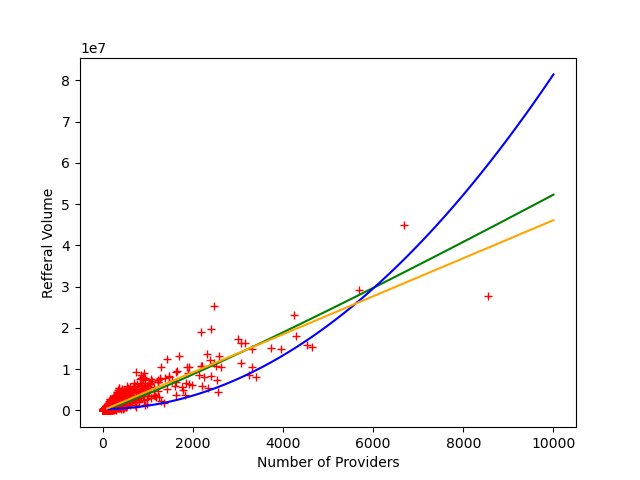

In [33]:
# Blank canvas
loglinearfg, loglinearax = mp.subplots()

# Label the axes
loglinearax.set_xlabel("Number of Providers")
loglinearax.set_ylabel("Refferal Volume")

# The actual data.
loglinearactual, = loglinearax.plot(
    df["Provider_number"],
    df["Referral_Volume"],
    "+r"
)

# The best fit line..
xticks = np.linspace(10000, 100)
loglinearexpect, = loglinearax.plot(
    xticks,
    loglinear_network.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglinearax.plot(
    xticks,
    quadratic_network.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglinearax.plot(
    xticks,
    linear_network.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Qualitative Diagnostics
We redraw our plot using a
log-log scale on the axes.


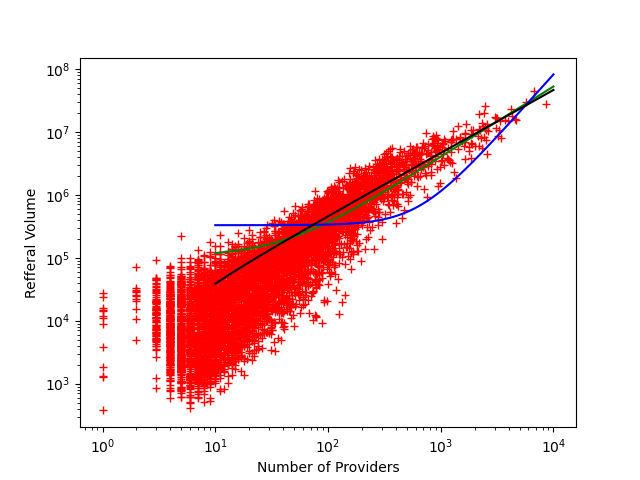

In [36]:
# Blank canvas
loglogfg, loglogax = mp.subplots()

# Label the axes
loglogax.set_xlabel("Number of Providers")
loglogax.set_ylabel("Refferal Volume")

# The actual data. There is one point per nation.
loglogactual, = loglogax.loglog(
    df["Provider_number"],
    df["Referral_Volume"],
    "+r"
)

# The best fit line. 
xticks = 10**np.linspace(1, 4, 100)
loglogexpect, = loglogax.loglog(
    xticks,
    loglinear_network.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglogax.loglog(
    xticks,
    quadratic_network.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglogax.loglog(
    xticks,
    linear_network.predict(xticks.reshape(-1, 1)),
    "black"
)

In [35]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate Pearson's r2 value for linear model
linear_predicted = linear_network.predict(df["Provider_number"].values.reshape(-1, 1))
linear_r2 = r2_score(df["Referral_Volume"].values, linear_predicted)

# Calculate Pearson's r2 value for quadratic model
quadratic_predicted = quadratic_network.predict((df["Provider_number"].values ** 2).reshape(-1, 1))
quadratic_r2 = r2_score(df["Referral_Volume"].values, quadratic_predicted)

# Calculate Pearson's r2 value for log-linear model
loglinear_predicted = loglinear_network.predict((df["Provider_number"].values * np.log(df["Provider_number"].values)).reshape(-1, 1))
loglinear_r2 = r2_score(df["Referral_Volume"].values, loglinear_predicted)

print(f"Pearson's r^2 value for Linear Activity: {linear_r2:.2f}")
print(f"Pearson's r^2 value for Quadratic Activity: {quadratic_r2:.2f}")
print(f"Pearson's r^2 value for Log-Linear Activity: {loglinear_r2:.2f}")

Pearson's r^2 value for Linear Activity: 0.85
Pearson's r^2 value for Quadratic Activity: 0.53
Pearson's r^2 value for Log-Linear Activity: 0.83


## Hypothesis Revision
From the log-log we can see that all the models fail for a city  with less than 10 number of providers.
The reason for this failure is our faulty assumption that the intercept $b$ is not
zero.

Lets rerun the models, asserting that the intercept is zero, and that all the data points
are positive.

In [18]:
linearrevised = lr(
    fit_intercept = False, # force interecept to be zero
    positive = True   # assume all the data is posoitive
).fit(
    X = df["Provider_number"].values.reshape(-1, 1),
    y = df["Referral_Volume"].values
)

# Take a look at the output
print("Linear activity model")
print("--------------------")
print(f"Intercept: {linearrevised.intercept_}")
print(f"Coefficient: {linearrevised.coef_[0]}")
print()


quadraticrevised = lr(
    fit_intercept = False,  # force interecept to be zero
    positive = True
).fit(
    X = (df["Provider_number"].values**2).reshape(-1, 1),
    y = df["Referral_Volume"].values
)

# Take a look at the output
print("Quadratic activity model")
print("-----------------------")
print(f"Intercept: {quadraticrevised.intercept_}")
print(f"Coefficient: {quadraticrevised.coef_[0]}")
print()


loglinearrevised = lr(
    fit_intercept = False,  # force interecept to be zero
    positive = True
).fit(
    X = (df["Provider_number"].values*np.log(df["Provider_number"].values)).reshape(-1, 1),
    y = df["Referral_Volume"].values
)

# Take a look at the output
print("Log-Linear activity model")
print("------------------------")
print(f"Intercept: {loglinearrevised.intercept_}")
print(f"Coefficient: {loglinearrevised.coef_[0]}") 

Linear activity model
--------------------
Intercept: 0.0
Coefficient: 4604.265245570712

Quadratic activity model
-----------------------
Intercept: 0.0
Coefficient: 0.8286824531272675

Log-Linear activity model
------------------------
Intercept: 0.0
Coefficient: 575.504663931559


In [24]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate Pearson's r2 value for revised linear model
linear_predicted_revised = linearrevised.predict(df["Provider_number"].values.reshape(-1, 1))
linear_r2_revised = r2_score(df["Referral_Volume"].values, linear_predicted_revised)

# Calculate Pearson's r2 value for revised quadratic model
quadratic_predicted_revised = quadraticrevised.predict((df["Provider_number"].values ** 2).reshape(-1, 1))
quadratic_r2_revised = r2_score(df["Referral_Volume"].values, quadratic_predicted_revised)

# Calculate Pearson's r2 value for revised log-linear model
loglinear_predicted_revised = loglinearrevised.predict((df["Provider_number"].values * np.log(df["Provider_number"].values)).reshape(-1, 1))
loglinear_r2_revised = r2_score(df["Referral_Volume"].values, loglinear_predicted_revised)

print(f"Pearson's r^2 value for Revised Linear Activity: {linear_r2_revised:.2f}")
print(f"Pearson's r^2 value for Revised Quadratic Activity: {quadratic_r2_revised:.2f}")
print(f"Pearson's r^2 value for Revised Log-Linear Activity: {loglinear_r2_revised:.2f}")

Pearson's r^2 value for Revised Linear Activity: 0.85
Pearson's r^2 value for Revised Quadratic Activity: 0.49
Pearson's r^2 value for Revised Log-Linear Activity: 0.82


## Rerun Diagnostics
Inspecting the coefficients of each model we can observe for each model:
* The linear model estimates that each provider provides $\approx 4604 $ referral volume
* The log-linear model estimates that each degree of separation between a provider and
refferal generates $\approx 575 \times \log(10) = 576$   referral volume,
where we are assuming each provider knows on average $10$ refferal.
* The quadratic model estimates that each potential connection between two providers
provideses $\approx 1 $ referral volume 

When we log-log plot the models we can see that both the linear and the log-linear models
estimate well, while the quadratic model is clearly a
poor estimator.

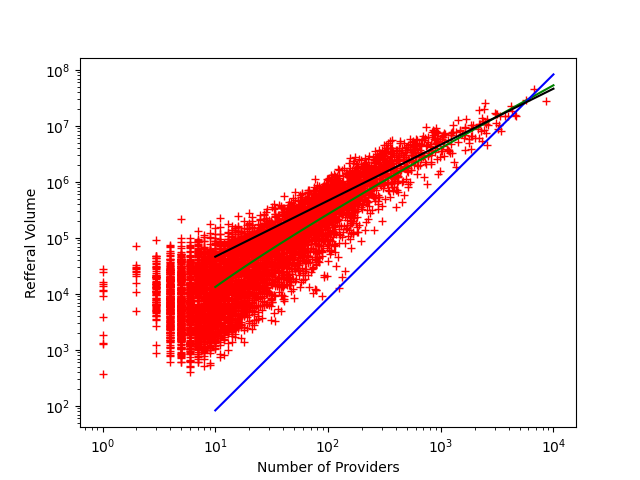

In [22]:
# Blank canvas
revisedfg, revisedax = mp.subplots()

# Label the axes
revisedax.set_xlabel("Number of Providers")
revisedax.set_ylabel("Refferal Volume")

# The actual data. There is one point per nation.
revisedactual, = revisedax.loglog(
    df["Provider_number"],
    df["Referral_Volume"],
    "+r"
)

# The best fit line.
xticks = 10**np.linspace(1, 4, 100)
revisedexpect, = revisedax.loglog(
    xticks,
    loglinearrevised.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
revisedax.loglog(
    xticks,
    quadraticrevised.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
revisedax.loglog(
    xticks,
    linearrevised.predict(xticks.reshape(-1, 1)),
    "black"
)

Revised model:
In the revised models, the intercept is forced to be zero, which means that the models are constrained to pass through the origin (0,0) on the plot. However, this constraint does not affect the R2 value, which remains the same as in the original models.

The R2 value represents the proportion of the variance in the dependent variable (Referral Volume) that is predictable from the independent variable(s) (Provider Number, Provider Number squared, and Provider Number times natural logarithm of Provider Number). This value is not affected by the choice of intercept, as it measures the goodness of fit of the model relative to the variance of the data.

In other words, while the revised models may have different intercepts, they still capture the same amount of variance in the data as the original models. Therefore, the R2 values remain unchanged between the original and revised models

The R2 values measure the proportion of the variance in the dependent variable (Referral Volume) that is explained by the independent variable(s) (Provider Number, Provider Number squared, and Provider Number times natural logarithm of Provider Number). The R2 value of the revised models are:
1.	Revised Linear Network:

	R2=0.85

2.	Revised Quadratic Network:

	R2=0.49

3.	Revised Log-Linear Network:

	R2=0.82

These revised models have been constrained to have an intercept of zero, meaning they pass through the origin. However, this constraint doesn't affect how much of the variance in the dependent variable is explained by the independent variable(s). Therefore, the R2 values for the revised models are almost the same as in the original models.
Now, compare these values with the R2 values of the original models:

1.	Original Linear Network:

	R2=0.85

2.	Original Quadratic Network:

	R2=0.53

3.	Original Log-Linear Network:

	R2=0.83


Here, the R2 values indicate the goodness of fit of the original models to the data. The revised models show slightly lower R2 values in the case of the quadratic model, which suggests that constraining the model to have an intercept of zero reduces its ability to explain the variance in the data compared to the original model. However, the differences in R2 values between the original and revised linear and log-linear models are minimal, indicating that the constraint has little effect on these models' explanatory power.
